# 作业6：图像线性与非线性滤波

In [2]:
import numpy as np
from skimage import io, exposure, color
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
%matplotlib inline

### 根据浮雕效果的实现原理（线性滤波），用PYTHON实现浮雕效果
- 首先，将彩色图像分解为三个独立的通道：红色（R）、绿色（G）和蓝色（B）。
- 利用卷积操作通过在图像的每个像素及其邻域上应用一个小的矩阵（称为卷积核或算子）来计算新的像素值。
- 水平方向的卷积核（h_kernel）检测图像中的水平变化，增强图像中的水平边缘。类似地，垂直方向的卷积核（v_kernel）用于检测图像中的垂直边缘。
- 卷积算子通常设计为**包含正负值，以突出像素值的差异**：正值和负值的组合可以增强边缘处的强度对比，模仿浮雕的视觉效果。水平卷积核和垂直卷积核分别检测图像中不同方向的梯度（变化率）。最后要对两组效果进行叠加。
> 下面的两组算子，后面一组类似于sobel算子，对边缘划分的更加清晰

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-912..912].


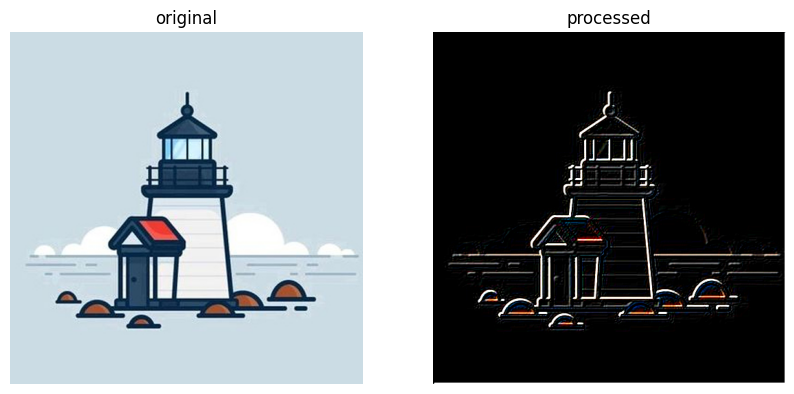

In [3]:
img = io.imread('tower.jpg')
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]
# 垂直方向算子
# h_kernel = np.array([[1,0,-1],
#                    [4,0,-4],
#                    [1,0,-1]])

# v_kernel = np.array([[4,1,0],
#                      [1,0,-1],
#                      [0,-1,-4]])

# 这一组类似于sobel算子，边缘划分比较清晰
h_kernel = np.array([[ -1, 0, 1],
                     [ -1, 0, 1],
                     [ -1, 0, 1]])
v_kernel = np.array([[ -1, -1, -1],
                     [ 0,  0,  0],
                     [ 1,  1,  1]])

R_embossed = convolve2d(R,h_kernel) + convolve2d(R,v_kernel)
G_embossed = convolve2d(G,h_kernel) + convolve2d(G,v_kernel)
B_embossed = convolve2d(B,h_kernel) + convolve2d(B,v_kernel)

embossed_image = np.stack([R_embossed, G_embossed, B_embossed], axis=2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title("original")

plt.subplot(1, 2, 2)
plt.imshow(embossed_image)
plt.axis('off')
plt.title("processed")

plt.show()